# Decision Tree

In [1]:
fo=open("data/dataset_tree.txt",'r') 
con=fo.read()
print(con)
#Blah Blah

from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat Food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df


In [2]:
from io import StringIO
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib
matplotlib.style.use('classic')
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)#CSV,Comma seperated values
df

,Plays Fetch,Is grumpy,Favorite food,Species
0,Yes,No,Bacon,Dog
1,No,Yes,Dog Food,Dog
2,No,Yes,Cat food,Cat
3,No,Yes,Bacon,Cat
4,No,No,Cat food,Cat
5,No,Yes,Bacon,Cat
6,No,Yes,Cat food,Cat
7,No,No,Dog Food,Dog
8,No,Yes,Cat food,Cat
9,Yes,No,Dog Food,Dog


In [3]:
# dataset={'Plays Fetch':['yes','yes','no'],'Is Grumpy':['no','yes','yes']}
# df= pd.DataFrame(dataset)
# df

In [4]:
df['B Plays Fetch']=np.where(df['Plays Fetch']=='Yes',\
                            True,False)
df['B Is grumpy']=np.where(df['Is grumpy']=='Yes',\
                          True,False)

In [5]:
df['B Fav Food']=[(0 if (food=='Bacon') else 1 \
                  if food=='Dog Food' else 2)\
                  for food in df['Favorite food']]
df

,Plays Fetch,Is grumpy,Favorite food,Species,B Plays Fetch,B Is grumpy,B Fav Food
0,Yes,No,Bacon,Dog,True,False,0
1,No,Yes,Dog Food,Dog,False,True,1
2,No,Yes,Cat food,Cat,False,True,2
3,No,Yes,Bacon,Cat,False,True,0
4,No,No,Cat food,Cat,False,False,2
5,No,Yes,Bacon,Cat,False,True,0
6,No,Yes,Cat food,Cat,False,True,2
7,No,No,Dog Food,Dog,False,False,1
8,No,Yes,Cat food,Cat,False,True,2
9,Yes,No,Dog Food,Dog,True,False,1


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# for regression use DescisiontreeRegressor

decisiontree= DecisionTreeClassifier(criterion= 'entropy',\
                                     max_depth=6)
obtained_tree= decisiontree.fit(df[['B Plays Fetch',\
                                   'B Is grumpy',\
                                   'B Fav Food']],df['Species'])
print(decisiontree.classes_)

['Cat' 'Dog']


In [8]:
obtained_tree.predict([[True,False,0]])

array(['Dog'], dtype=object)

In [9]:
predicted=obtained_tree.predict(df[['B Plays Fetch',\
                                   'B Is grumpy',\
                                   'B Fav Food']])

In [10]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

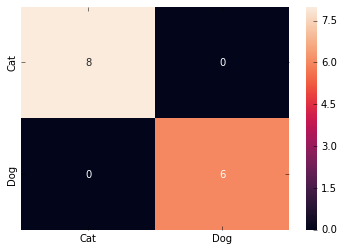

In [11]:
sb.heatmap(confusion_matrix(df['Species'],predicted),\
           annot=True,xticklabels=decisiontree.classes_,\
          yticklabels=decisiontree.classes_)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(df['Species'],predicted))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         8
         Dog       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



# INSTALL graphviz from google

In [13]:
import pydotplus as pp

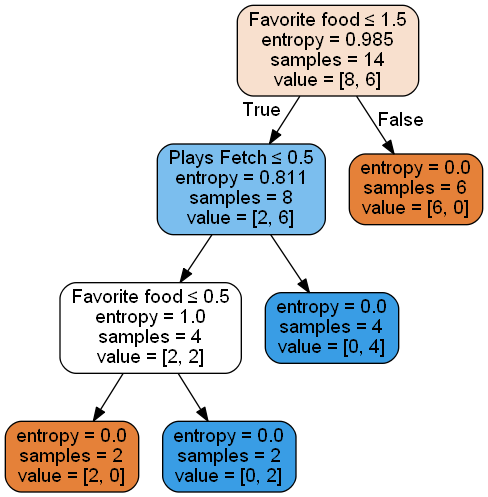

In [19]:
import os
os.environ["PATH"]+=os.pathsep +\
'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from IPython.display import Image

DecisionTreeImg = StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,
               filled=True,rounded=True,
               feature_names=["Plays Fetch",
                             "Is grumpy",
                             "Favorite food"],
               special_characters=True)

graph=pp.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())